In [127]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt  
import cvxpy as cp 
 
import pandas as pd

np.random.seed(55)

# Turn off progress printing  
#solvers.options['show_progress'] = False  

In [128]:
## NUMBER OF ASSETS  
n_assets = 4

## NUMBER OF OBSERVATIONS  
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

In [129]:
np.average(return_vec,axis=1)

array([0.01459873, 0.00457984, 0.00010651, 0.03879915])

Text(0, 0.5, 'returns')

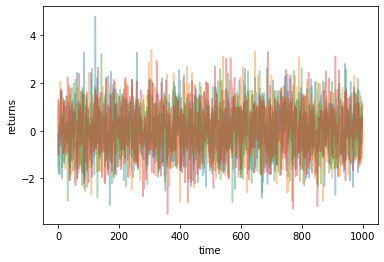

In [130]:
plt.plot(return_vec.T, alpha=.4);  
plt.xlabel('time')  
plt.ylabel('returns') 

In [131]:
def rand_weights(n):  
        ''' Produces n random weights that sum to 1 '''  
        k = np.random.rand(n)  
        return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.26245398 0.22534624 0.2972843  0.21491548]
[0.0397533  0.34633809 0.3798144  0.2340942 ]


In [132]:
def random_portfolio(returns):  
    '''  
    Returns the mean and standard deviation of returns for a random portfolio  
    '''

    p = np.asmatrix(np.mean(returns, axis=1))  
    w = np.asmatrix(rand_weights(returns.shape[0]))  
    C = np.asmatrix(np.cov(returns))  
    mu = w * p.T  
    sigma = np.sqrt(w * C * w.T)  
    # This recursion reduces outliers to keep plots pretty  
    if sigma > 2:  
        return random_portfolio(returns)  
    return mu, sigma 

In [133]:
n_portfolios = 500  
means, stds = np.column_stack([  
    random_portfolio(return_vec)  
    for i in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

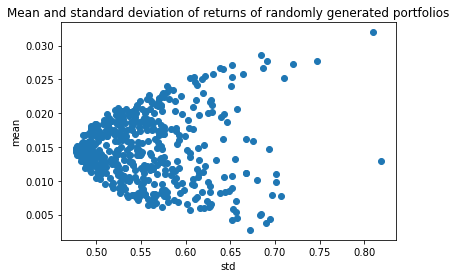

In [134]:
plt.plot(stds, means, 'o')  
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Mean and standard deviation of returns of randomly generated portfolios') 

In [135]:
np.cov(return_vec)

array([[ 9.93961616e-01,  1.00185824e-02, -6.80865964e-02,
        -8.07087623e-02],
       [ 1.00185824e-02,  1.04833675e+00, -7.07507934e-04,
        -2.35567227e-02],
       [-6.80865964e-02, -7.07507934e-04,  9.54119841e-01,
        -3.11243359e-02],
       [-8.07087623e-02, -2.35567227e-02, -3.11243359e-02,
         1.06007922e+00]])

In [175]:
np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)

In [176]:
w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T*w 
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma*risk), 
               [cp.sum(w) == 1, 
                w >= 0])

In [177]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

In [172]:
mu = np.abs(np.random.randn(4, 1))
sigma = np.random.randn(4, 4)
sigma = sigma.T.dot(sigma)

In [173]:
x1 = cp.Variable(n_assets)
gamma = cp.Parameter(nonneg=True)
ret = mu.T*x1 
risk= cp.quad_form(x1,sigma)

constraints = [cp.sum(x1) == 1,
              w>=0]

problem = cp.Problem(cp.Maximize(ret-gamma*risk),constraints)

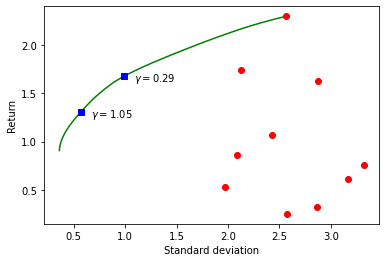

In [187]:
markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.1, ret_data[marker]-.05))
    
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

In [197]:
(ret_data-risk_data)

array([-0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 ,
       -0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 ,
       -0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 , -0.2618846 ,
       -0.17709433, -0.09280756, -0.02488861,  0.02915419,  0.10970088,
        0.19309068,  0.27188049,  0.3549841 ,  0.43370621,  0.50012358,
        0.55552824,  0.6011343 ,  0.63809111,  0.66748965,  0.69036255,
        0.70767896,  0.72033652,  0.72915282,  0.73563399,  0.74438594,
        0.75065463,  0.753934  ,  0.75460192,  0.75310463,  0.74739644,
        0.74053914,  0.73268811,  0.72401433,  0.71470002,  0.70493233,
        0.69489587,  0.6847652 ,  0.67469837,  0.66483218,  0.65527955,
        0.64612879,  0.63744465,  0.62927036,  0.61764988,  0.60564843,
        0.59543559,  0.59077317,  0.58650033,  0.58259886,  0.57904774,
        0.57582434,  0.57290538,  0.57026756,  0.56788809,  0.56574503,
        0.56381755,  0.56208605,  0.56053224,  0.55913918,  0.55

In [164]:
mu.shape

(4,)

In [33]:
problem = cp.Problem(cp.Minimize(risk),constraints)

In [34]:
problem.solve()

0.2246262763535499

In [48]:
r_out = np.dot(return_vec.T,(x1.value)).mean()
v_out = x1.value.T.dot(sigma).dot(x1.value)

print("Return: {}".format(r_out))
print("Variance: {}".format(v_out))

Return: 0.011272816862579521
Variance: 0.2246262763535499


In [51]:
return_vec

45.656808744672716

In [142]:
np.average(return_vec,axis=1)

array([0.01459873, 0.00457984, 0.00010651, 0.03879915])

In [145]:
w = np.array([.25,.25,.25,.25])

In [148]:
mu.T*w

array([3.64968221e-03, 1.14495916e-03, 2.66272550e-05, 9.69978770e-03])

In [149]:
w

array([0.25, 0.25, 0.25, 0.25])

In [151]:
mu.T.dot(w)

0.014521056327745568

In [158]:
mu.dot(w)

0.014521056327745568

In [159]:
np.abs(np.random.randn(4, 1)).shape

(4, 1)